In [ ]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
from nltk.corpus  import stopwords
import nltk
nltk.download('stopwords')
import string
import seaborn as sns
from wordcloud import WordCloud
from sklearn import preprocessing
import plotly.express as px

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/news_articles.csv", encoding="latin", index_col=0)
df.head()

,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
author,,,,,,,,,,,
Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


In [ ]:
df.head()

,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
author,,,,,,,,,,,
Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


In [ ]:
df.tail()

,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
author,,,,,,,,,,,
-NO AUTHOR-,2016-10-27T15:36:10.573+03:00,teens walk free after gangrape conviction,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/hillary_haunt...,bias,Real,good samaritan wearing indian headdress disarm...,NaN,1.0
-NO AUTHOR-,2016-10-27T15:36:10.671+03:00,school named for munichmassacre mastermind,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/rambo_richard...,bias,Real,skype sex scam fortune built shame,NaN,1.0
-NO AUTHOR-,2016-10-27T13:30:00.000+03:00,russia unveils satan missile,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/skype_sex_sca...,bs,Fake,cannabis aficionados develop thca crystalline ...,NaN,1.0
-NO AUTHOR-,2016-10-27T15:58:41.935+03:00,check out hillarythemed haunted house,NaN,english,wnd.com,http://worldtruth.tv/wp-content/uploads/2016/1...,bs,Fake,title,NaN,0.0
Eddy Lavine,2016-10-28T01:02:00.000+03:00,cannabis aficionados develop thca crystalline ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isna().sum()

published                   0
title                       0
text                       46
language                    1
site_url                    1
main_img_url                1
type                        1
label                       1
title_without_stopwords     2
text_without_stopwords     50
hasImage                    1
dtype: int64

In [ ]:
df = df.dropna()
df

,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
author,,,,,,,,,,,
Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0
...,...,...,...,...,...,...,...,...,...,...,...
Matt Barber,2016-10-27T03:04:50.327+03:00,why never trumpers must reconsider,prof canoes reek of genocide white privilege c...,english,wnd.com,No Image URL,bias,Real,trump vs clinton risk vs disaster,check hillarythemed haunted house anticlinton ...,0.0
Jane Chastain,2016-10-27T03:04:50.704+03:00,election crossroads socialism or capitalism,teens walk free after gangrape conviction judg...,english,wnd.com,No Image URL,bias,Real,gingrich slutshames megyn kelly,good samaritan wearing indian headdress disarm...,1.0
Michael Brown,2016-10-27T03:04:54.788+03:00,reasons ill vote for trump,school named for munichmassacre mastermind ter...,english,wnd.com,http://mobile.wnd.com/files/2011/12/leftfield3...,bias,Real,youtube bans clintons black son,skype sex scam fortune built shame moroccan bo...,1.0


In [ ]:
df.isna().sum()

published                  0
title                      0
text                       0
language                   0
site_url                   0
main_img_url               0
type                       0
label                      0
title_without_stopwords    0
text_without_stopwords     0
hasImage                   0
dtype: int64

In [ ]:
df.reset_index(inplace=True)
df.drop("author",axis=1,inplace=True)

In [ ]:
df.head()

,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


In [ ]:
df.shape

(2045, 11)

In [ ]:
df.count()

published                  2045
title                      2045
text                       2045
language                   2045
site_url                   2045
main_img_url               2045
type                       2045
label                      2045
title_without_stopwords    2045
text_without_stopwords     2045
hasImage                   2045
dtype: int64

In [ ]:
df['site_url'].unique()

array(['100percentfedup.com', '21stcenturywire.com', 'abcnews.com.co',
       'abeldanger.net', 'abovetopsecret.com', 'activistpost.com',
       'addictinginfo.org', 'adobochronicles.com', 'ahtribune.com',
       'allnewspipeline.com', 'americannews.com',
       'americasfreedomfighters.com', 'amren.com', 'amtvmedia.com',
       'awdnews.com', 'barenakedislam.com', 'clickhole.com',
       'coasttocoastam.com', 'corbettreport.com', 'countercurrents.org',
       'counterpunch.org', 'dailywire.com', 'darkmoon.me',
       'davidduke.com', 'davidstockmanscontracorner.com',
       'davidwolfe.com', 'dcclothesline.com', 'defenddemocracy.press',
       'dennismichaellynch.com', 'departed.co', 'der-postillon.com',
       'fromthetrenchesworldreport.com', 'frontpagemag.com',
       'galacticconnection.com', 'globalresearch.ca', 'infowars.com',
       'intrepidreport.com', 'legorafi.fr', 'madworldnews.com',
       'naturalnews.com', 'newstarget.com', 'politicususa.com',
       'presstv.com', 'pre

In [ ]:
df.columns

Index(['published', 'title', 'text', 'language', 'site_url', 'main_img_url',
       'type', 'label', 'title_without_stopwords', 'text_without_stopwords',
       'hasImage'],
      dtype='object')

In [ ]:
df['label'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Real
1       Real
2       Real
3       Real
4       Real
        ... 
2040    Real
2041    Real
2042    Real
2043    Real
2044    Real
Name: label, Length: 2045, dtype: object>

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['label']= label_encoder.fit_transform(df['label'])

In [ ]:
df['label'].unique()

array([1, 0])

In [ ]:
df['label'].value_counts()

0    1291
1     754
Name: label, dtype: int64

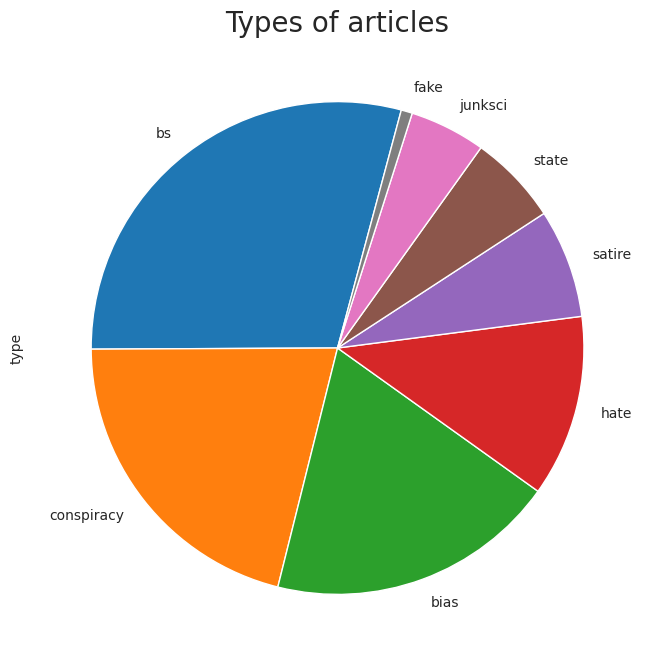

In [ ]:
df['type'].value_counts().plot.pie(figsize = (8,8), startangle = 75)
plt.title('Types of articles', fontsize = 20)
plt.axis('on')
plt.show()

<Axes: xlabel='label', ylabel='count'>

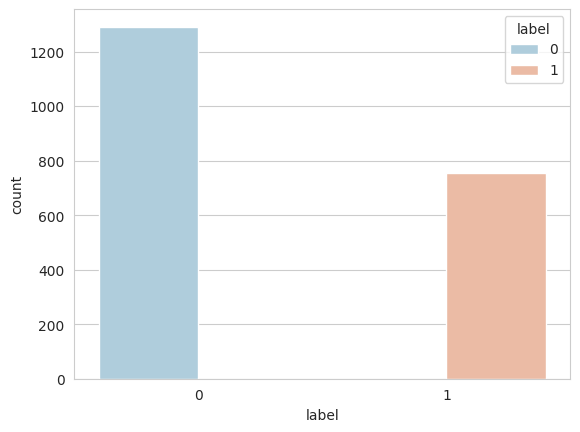

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='label',hue='label',data=df,palette='RdBu_r')

In [ ]:
px.bar(df['label'].value_counts(),template="plotly_dark")

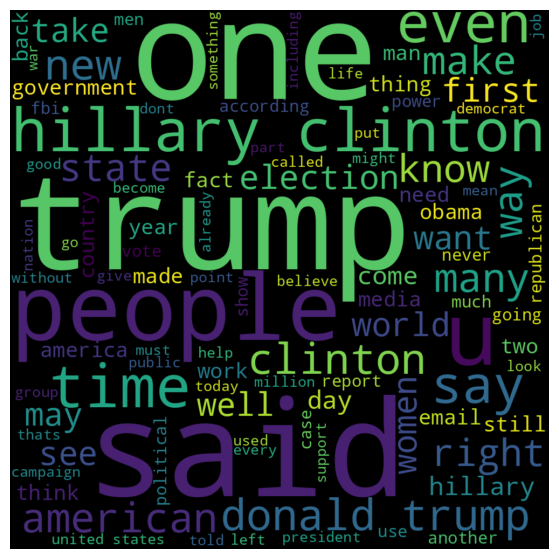

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(background_color="black", max_words=100,max_font_size=256,random_state=42, width=1000, height=1000)
wc.generate(' '.join(df['text_without_stopwords']))
plt.figure(figsize=(10,7))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

**Word cloud for fake news**

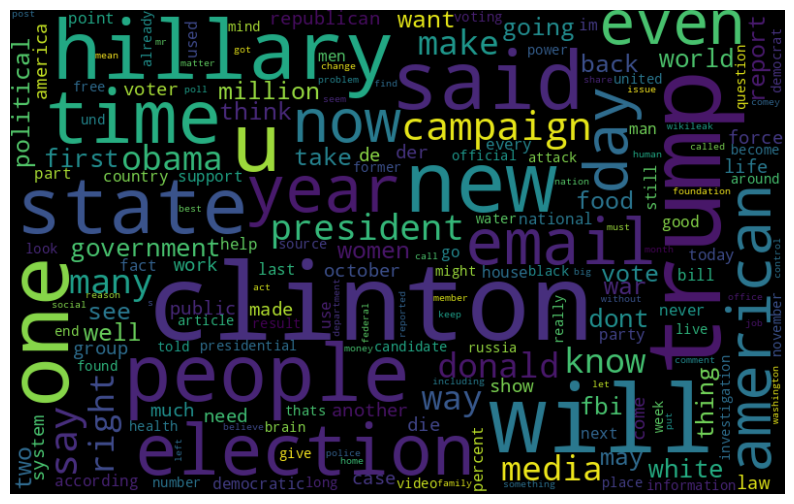

In [ ]:
from wordcloud import WordCloud

fake_data = df[df["label"] == 0]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Word cloud for real news**

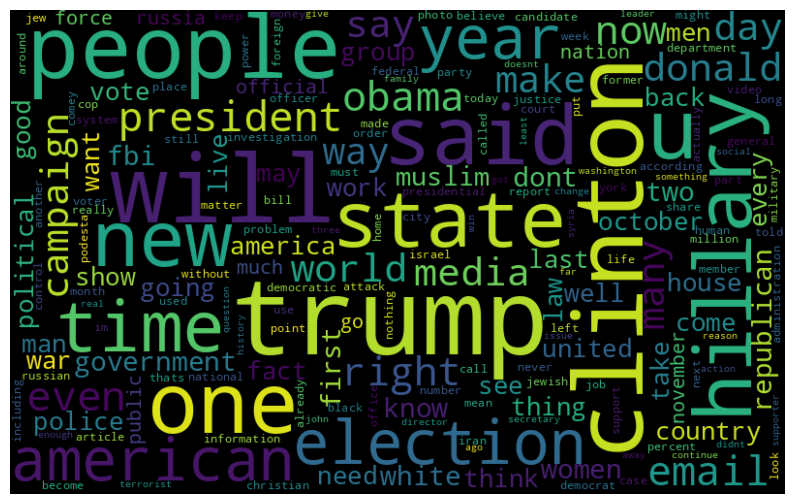

In [ ]:
from wordcloud import WordCloud

real_data = df[df["label"] == 1]
all_words = ' '.join([text for text in real_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Creating the function to html path to check whether the real or fake**

In [ ]:
def convert(path):
    return '<img src="'+ path + '" width="80">'
df_sources = df[['site_url','label','main_img_url']]
df_r = df_sources.loc[df['label']== 1].iloc[6:10,:]
df_f = df_sources.loc[df['label']== 0].head(6)

**Real news websites**

In [ ]:
from IPython.core.display import HTML
HTML(df_r.to_html(escape=False,formatters=dict(main_img_url=convert)))

,site_url,label,main_img_url
6,100percentfedup.com,1,
7,100percentfedup.com,1,
8,100percentfedup.com,1,
9,100percentfedup.com,1,


**Fake news websites**

In [ ]:
HTML(df_f.to_html(escape=False,formatters=dict(main_img_url=convert)))

,site_url,label,main_img_url
33,21stcenturywire.com,0,
34,21stcenturywire.com,0,
35,21stcenturywire.com,0,
36,21stcenturywire.com,0,
37,21stcenturywire.com,0,
38,21stcenturywire.com,0,


**Shuffing the data**

In [ ]:
df1 = df.sample(frac=1)
df1.head()

,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
2036,2016-10-27T03:04:37.085+03:00,youtube bans clintons black son,hillary emails whitelisted for obamas blackber...,english,wnd.com,No Image URL,bias,1,never trumpers must reconsider,prof canoes reek genocide white privilege craf...,0.0
142,2016-10-27T00:53:00.000+03:00,we know the truth,found this nugget in podesta files fastwalkers...,english,abovetopsecret.com,http://files.abovetopsecret.com/images/ats10.jpg,bs,0,know truth,found nugget podesta files fastwalkers dsp pro...,1.0
978,2016-11-11T14:48:46.540+02:00,musik statt lÃ¤rm erster laubblÃ¤ser mit einge...,sonntag november forscher entdecken abgelege...,german,der-postillon.com,https://1.bp.blogspot.com/-mTbzGFx2OsY/VGIcYI8...,bs,0,morgen pams kommt die nÃ¤chste flÃ¼chtlingswel...,hÃ¤nde weg vom alkohol schreiner rÃ¼hrt nach a...,1.0
199,2016-10-27T18:00:33.040+03:00,a conundrum of the current political season,by nika knight whistleblower edward snowden wa...,english,activistpost.com,No Image URL,conspiracy,0,conundrum current political season,nika knight whistleblower edward snowden warne...,0.0
1936,2016-10-26T22:46:37.456+03:00,no title,the jorge cabrera scandal first lady photoop w...,english,westernjournalism.com,http://static.westernjournalism.com/wp-content...,bias,1,title,wrh server back normal except hack attacks tho...,1.0


 **Creating a function to process the texts**


In [ ]:
def wordopt(text_without_stopwords):
    text_without_stopwords = text_without_stopwords.lower()
    text_without_stopwords = re.sub('\[.*?\]', '', text_without_stopwords)
    text_without_stopwords = re.sub("\\W"," ",text_without_stopwords) 
    text_without_stopwords = re.sub('https?://\S+|www\.\S+', '', text_without_stopwords)
    text_without_stopwords = re.sub('<.*?>+', '', text_without_stopwords)
    text_without_stopwords = re.sub('[%s]' % re.escape(string.punctuation), '', text_without_stopwords)
    text_without_stopwords = re.sub('\n', '', text_without_stopwords)
    text_without_stopwords = re.sub('\w*\d\w*', '', text_without_stopwords)    
    return text_without_stopwords

In [ ]:
df["text_without_stopwords"] = df["text_without_stopwords"].apply(wordopt)

In [ ]:
x = df["text_without_stopwords"]
y = df["label"]

**Term Frequency and Inverse Document Frequency**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv = vectorization.fit_transform(x)

**We have balanced the data using undersampling by ENN**

In [ ]:
from imblearn.under_sampling import EditedNearestNeighbours
undersample = EditedNearestNeighbours(n_neighbors=3)
X, Y = undersample.fit_resample(xv, y)

**Train and test split**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.20,random_state=None)

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [ ]:
pred_lr=LR.predict(x_test)
LR.score(x_test, y_test)

0.850187265917603

In [ ]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.81      0.64      0.71        96
           1       0.82      0.92      0.87       171

    accuracy                           0.82       267
   macro avg       0.82      0.78      0.79       267
weighted avg       0.82      0.82      0.81       267



**Decision Tree Classifier** 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
pred_dr=DT.predict(x_test)
DT.score(x_test, y_test)

0.7528089887640449

In [ ]:
print(classification_report(y_test, pred_dr))

              precision    recall  f1-score   support

           0       0.63      0.75      0.69        96
           1       0.84      0.75      0.80       171

    accuracy                           0.75       267
   macro avg       0.74      0.75      0.74       267
weighted avg       0.77      0.75      0.76       267



**Gradient Boosting Classifier** 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(x_train,y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
pred_gbc=GBC.predict(x_test)
GBC.score(x_test, y_test)

0.8164794007490637

In [ ]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       0.81      0.64      0.71        96
           1       0.82      0.92      0.87       171

    accuracy                           0.82       267
   macro avg       0.82      0.78      0.79       267
weighted avg       0.82      0.82      0.81       267



**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
pred_rfc = RFC.predict(x_test)
RFC.score(x_test, y_test)

0.8576779026217228

In [ ]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.94      0.65      0.77        96
           1       0.83      0.98      0.90       171

    accuracy                           0.86       267
   macro avg       0.89      0.81      0.83       267
weighted avg       0.87      0.86      0.85       267



**Support Vector Machine**

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(x_train, y_train)

In [ ]:
pred_clf=clf.predict(x_test)
clf.score(x_test, y_test)

0.9026217228464419

In [ ]:
print(classification_report(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        96
           1       0.91      0.95      0.93       171

    accuracy                           0.90       267
   macro avg       0.90      0.89      0.89       267
weighted avg       0.90      0.90      0.90       267



**Ada Boost Classifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
Adab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),n_estimators=5,random_state=1)
Adab.fit(x_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=10),
                   n_estimators=5, random_state=1)

In [ ]:
pred_adab = Adab.predict(x_test)
ABscore = metrics.accuracy_score(y_test,pred_adab)
print("accuracy: %0.3f" %ABscore)

accuracy: 0.745


In [ ]:
print(classification_report(y_test, pred_adab))

              precision    recall  f1-score   support

           0       0.62      0.75      0.68        96
           1       0.84      0.74      0.79       171

    accuracy                           0.75       267
   macro avg       0.73      0.75      0.73       267
weighted avg       0.76      0.75      0.75       267



**XGB Classifier**

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [ ]:
pred_xgb = model.predict(x_test)
SGD= accuracy_score(y_test, pred_xgb)

In [ ]:
print(classification_report(y_test, pred_xgb))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72        96
           1       0.84      0.85      0.85       171

    accuracy                           0.80       267
   macro avg       0.79      0.78      0.78       267
weighted avg       0.80      0.80      0.80       267



**SGD Classifier**

In [ ]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss='log', penalty='l2', alpha=0.0001, random_state=42)
clf.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.



SGDClassifier(loss='log', random_state=42)

In [ ]:
pred_sgd = clf.predict(x_test)
accuracy_score(y_test, pred_sgd)

0.9026217228464419

In [ ]:
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        96
           1       0.91      0.95      0.93       171

    accuracy                           0.90       267
   macro avg       0.90      0.89      0.89       267
weighted avg       0.90      0.90      0.90       267

